## ETL archivo users_items.


### Importo los modulos de pandas,gzip y matplotlib necesarios para la limpieza de datos, para descomprimir el archivo json.gz y poder revisar algunas metricas iniciales a través de graficas.

In [9]:
import pandas as pd
import gzip,ast
import matplotlib.pyplot as plt

### Extracción de archivos users_items en formato gz

In [10]:
# Paso a una lista la informacion del archivo gz y corrigo los errores de formato del archvio json.
data=[]
with gzip.open('users_items.json.gz','rb') as file:
    for line in file:
        lineaUnicode=line.decode('utf-8')
        data.append(lineaUnicode)

In [11]:
# Elimino la decodificacion no valida del archivo json
for i in range(len(data)):
    data[i]=data[i].encode('utf-8','ignore').decode('utf-8')

In [12]:
# Con la librería ast y el método literl_eval desanido las listas.
for i in range(len(data)):
    data[i]=ast.literal_eval(data[i])

In [13]:
# creo una copia del DataFrame
df_copia=pd.DataFrame(data)
df_copia.head()

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."


In [19]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      88310 non-null  object
 1   items_count  88310 non-null  int64 
 2   steam_id     88310 non-null  object
 3   user_url     88310 non-null  object
 4   items        88310 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


### Se observa dentro del campo items un diccionario con al información de los items, procedo a desanidar el diccionario.

In [15]:
# creo un nuevo DataFrame con la información del diccionario
df=pd.DataFrame(data)

# desanido los diccionarios
df= df.explode('items', ignore_index=True)


df = pd.json_normalize(df['items'])


df.head()


,item_id,item_name,playtime_forever,playtime_2weeks
0,10,Counter-Strike,6.0,0.0
1,20,Team Fortress Classic,0.0,0.0
2,30,Day of Defeat,7.0,0.0
3,40,Deathmatch Classic,0.0,0.0
4,50,Half-Life: Opposing Force,0.0,0.0


### Realizo la concatenación del data frame df_copia, con el nuevo dataframe df

In [17]:


# Selecciono los campos específicos de dfCopy
dfcopia_selected = df_copia[['user_id', 'items_count', 'steam_id', 'user_url']]

# Selecciono los campos específicos de df
df_selected = df[['item_id', 'item_name', 'playtime_forever', 'playtime_2weeks']]

# Concateno los DataFrames
concatenated_df = pd.concat([dfcopia_selected, df_selected], axis=1)

concatenated_df.head()


,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277.0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6.0,0.0
1,js41637,888.0,76561198035864385,http://steamcommunity.com/id/js41637,20,Team Fortress Classic,0.0,0.0
2,evcentric,137.0,76561198007712555,http://steamcommunity.com/id/evcentric,30,Day of Defeat,7.0,0.0
3,Riot-Punch,328.0,76561197963445855,http://steamcommunity.com/id/Riot-Punch,40,Deathmatch Classic,0.0,0.0
4,doctr,541.0,76561198002099482,http://steamcommunity.com/id/doctr,50,Half-Life: Opposing Force,0.0,0.0


### Observo las caracteristicas del nuevo dataframe cn el metodo info()

In [18]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5170015 entries, 0 to 5170014
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   items_count       float64
 2   steam_id          object 
 3   user_url          object 
 4   item_id           object 
 5   item_name         object 
 6   playtime_forever  float64
 7   playtime_2weeks   float64
dtypes: float64(3), object(5)
memory usage: 315.6+ MB


### Observaciones : Nota' antes de desanidar los diccionarios la longitud del dataframe df_copia era de 88310 registros , y el dataframe df con 5170015, al concaquetar los dos dataframe . la longitud crecio a 5170015 lo que significa que hay bastantes datos faltantes.

### Se debe eliminar los datos faltantes 


In [20]:
# Eliminado datos faltantes
concatenated_df.dropna(inplace=True)

In [24]:
# reorganizo los indices 
concatenated_df.reset_index(drop=True, inplace=True)
print(concatenated_df.index)

RangeIndex(start=0, stop=88176, step=1)


In [28]:
# Verifico la nueva longitud del dataFrame y sus caracteristicas.
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88176 entries, 0 to 88175
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           88176 non-null  object 
 1   items_count       88176 non-null  float64
 2   steam_id          88176 non-null  object 
 3   user_url          88176 non-null  object 
 4   item_id           88176 non-null  object 
 5   item_name         88176 non-null  object 
 6   playtime_forever  88176 non-null  float64
 7   playtime_2weeks   88176 non-null  float64
dtypes: float64(3), object(5)
memory usage: 5.4+ MB


### Despues de eliminar los datos faltantes se observa una disminución en el numero de registros. reviso la cabeza y la cola del dataframe para ver algunos datos dentro del los campos, es necesario transformar el campo item_id de categorico a numerico


In [26]:
concatenated_df.head(10)

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277.0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6.0,0.0
1,js41637,888.0,76561198035864385,http://steamcommunity.com/id/js41637,20,Team Fortress Classic,0.0,0.0
2,evcentric,137.0,76561198007712555,http://steamcommunity.com/id/evcentric,30,Day of Defeat,7.0,0.0
3,Riot-Punch,328.0,76561197963445855,http://steamcommunity.com/id/Riot-Punch,40,Deathmatch Classic,0.0,0.0
4,doctr,541.0,76561198002099482,http://steamcommunity.com/id/doctr,50,Half-Life: Opposing Force,0.0,0.0
5,MinxIsBetterThanPotatoes,371.0,76561198004744620,http://steamcommunity.com/id/MinxIsBetterThanP...,60,Ricochet,0.0,0.0
6,NitemarePK,304.0,76561197990951820,http://steamcommunity.com/id/NitemarePK,70,Half-Life,0.0,0.0
7,themanwich,258.0,76561198035296505,http://steamcommunity.com/id/themanwich,130,Half-Life: Blue Shift,0.0,0.0
8,maplemage,629.0,76561198026584251,http://steamcommunity.com/id/maplemage,300,Day of Defeat: Source,4733.0,0.0
9,Wackky,0.0,76561198039117046,http://steamcommunity.com/id/Wackky,240,Counter-Strike: Source,1853.0,0.0


In [27]:
concatenated_df.tail(10)

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
88166,76561198318100691,0.0,76561198318100691,http://steamcommunity.com/profiles/76561198318...,205100,Dishonored,146.0,0.0
88167,76561198319916652,4.0,76561198319916652,http://steamcommunity.com/profiles/76561198319...,224540,Ace of Spades,2160.0,0.0
88168,76561198320038728,5.0,76561198320038728,http://steamcommunity.com/profiles/76561198320...,99900,Spiral Knights,2005.0,0.0
88169,76561198320136420,321.0,76561198320136420,http://steamcommunity.com/profiles/76561198320...,213650,Dwarfs F2P,62.0,0.0
88170,ArkPlays7,4.0,76561198321542621,http://steamcommunity.com/id/ArkPlays7,219340,The Banner Saga: Factions,11.0,0.0
88171,76561198323066619,22.0,76561198323066619,http://steamcommunity.com/profiles/76561198323...,202090,Magicka: Wizard Wars,1501.0,0.0
88172,76561198326700687,177.0,76561198326700687,http://steamcommunity.com/profiles/76561198326...,239220,The Mighty Quest For Epic Loot,2374.0,0.0
88173,XxLaughingJackClown77xX,0.0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...,257730,Infinity Wars - Animated Trading Card Game,654.0,0.0
88174,76561198329548331,7.0,76561198329548331,http://steamcommunity.com/profiles/76561198329...,227220,Sang-Froid - Tales of Werewolves,2973.0,0.0
88175,edward_tremethick,0.0,76561198331598578,http://steamcommunity.com/id/edward_tremethick,233740,Organ Trail: Director's Cut,943.0,0.0


In [29]:


# Convierto la columna "item_id" a tipo numérico
concatenated_df['item_id'] = pd.to_numeric(concatenated_df['item_id'], errors='coerce')

# Verifico la transformación
concatenated_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88176 entries, 0 to 88175
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           88176 non-null  object 
 1   items_count       88176 non-null  float64
 2   steam_id          88176 non-null  object 
 3   user_url          88176 non-null  object 
 4   item_id           88176 non-null  int64  
 5   item_name         88176 non-null  object 
 6   playtime_forever  88176 non-null  float64
 7   playtime_2weeks   88176 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 5.4+ MB


### Realizo una prueba de consulta en donde grafico con barras horizontales el top de los 10 usuarios que mas han jugado, para verificar que no hay ningun problema en las consultas y los datos se encuetran bien despues del ETL

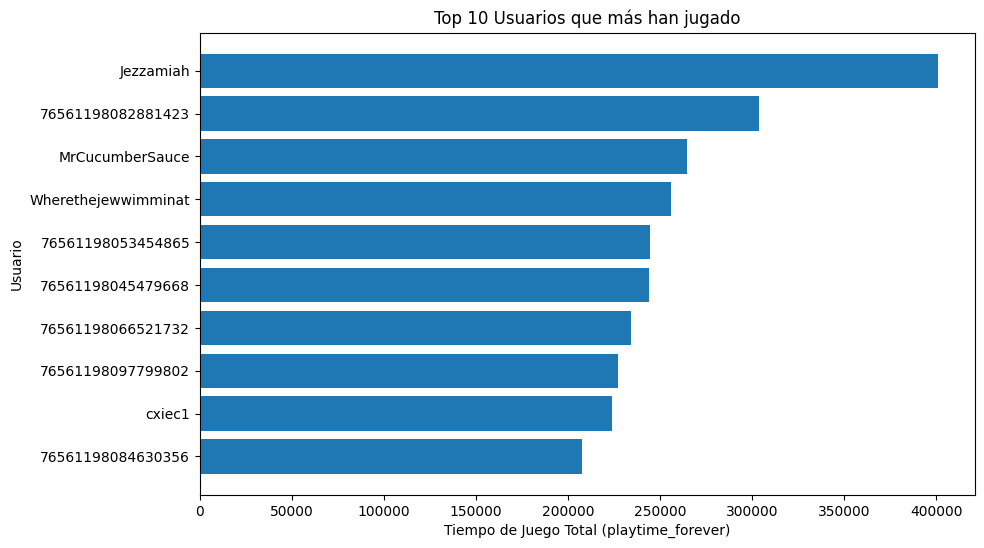

In [32]:


# Encuentr0 los 10 usuarios que más han jugado
top_10_usuarios = concatenated_df.nlargest(10, 'playtime_forever')

# Creo una gráfica de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(top_10_usuarios['user_id'], top_10_usuarios['playtime_forever'])
plt.xlabel('Tiempo de Juego Total (playtime_forever)')
plt.ylabel('Usuario')
plt.title('Top 10 Usuarios que más han jugado')
plt.gca().invert_yaxis()  # Invierto el eje y para mostrar el usuario con el máximo tiempo arriba
plt.show()


### Guardo el dataframe limpio en un archivo .parquet

In [34]:

# Especifico la ruta y el nombre del archivo Parquet en la carpeta del proyecto
archivo_parquet = "users_items.parquet"

# Guardo el DataFrame en un archivo Parquet en la carpeta del proyecto
concatenated_df.to_parquet(archivo_parquet, index=False)
